### Gradient Boosting Regressor Algorithm:-

1.  The main aim of this project is to predict the house price of the Caliornia Housing Dataset using Gradient Boosting Regressor.

###  Steps Covered

1.  Importing all the necessary  Libraries

2.  Loading the Dataset

3.  Perform the Data Exploration

4.  Do Data Preprocessing 

5. Divide the dataset into independent and dependent features and feature scaling on the inputs

6. Splitting the Data into training and testing data

7.  Train Gradient Boosting Model

8.  Perform the Predictions

9. Do the Evaluation of the Algorithm

10. Plot the Actual vs  Predicted Price Value

11. Check the feature importances

### Step 1:  Importing all the necessary  Libraries

In [848]:
import  numpy              as   np
import  pandas             as   pd
import  matplotlib.pyplot  as   plt
import  seaborn            as   sns

from    sklearn.datasets         import  fetch_california_housing
from    sklearn.model_selection  import  train_test_split
from    sklearn.preprocessing    import  StandardScaler
from    sklearn.ensemble         import  GradientBoostingRegressor
from    sklearn.metrics          import  mean_absolute_error, mean_squared_error, root_mean_squared_error

### Step 2:  Loading the Dataset

In [849]:
data = fetch_california_housing()

In [850]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [851]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [852]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [853]:
### Construct the datarame from the above data

df = pd.DataFrame(data.data, columns=data.feature_names)

In [854]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [855]:
### Adding the target column in the dataset

df['MedHouseVal'] = data.target

In [856]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### OBSERVATIONS:

1. The above dataset contains the information related to the California  Housing dataset.

   The input details are as follows:-

    (a.)   MedInc ------------>   Median Income of the person in the California Household.

    (b.)   HouseAge ----------->  Age of the House Hold.

    (c.)   AveRooms ----------->  Average number of Rooms in a California Household.

    (d.)  AveBedrms ----------->  Average number of bedrooms in a California Household.

    (e.)  Population ----------->  Total population in a district.

    (f.)  AveOccup   ----------->  Average occupancy of the person in a household.

    (h.)  Latitude  ------------>  Geographical latitude.

    (i.)  Longitude ------------>  Geographical  longitude.

    (j.)  MedHouseVal ---------->  Price o the household.

### Step 3: Perform the Data Exploration

In [857]:
### display the first five rows of the dataset

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [858]:
### display the last five rows of the dataset

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [859]:
### display the columns in the dataset

df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [860]:
### display the total length of the dataset

print("Total length of the records in the dataset is:", len(df))

Total length of the records in the dataset is: 20640


In [861]:
### shape of the dataset

df.shape

(20640, 9)

In [862]:
### get the information about all the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [863]:
### get the statistical summary about the dataset

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

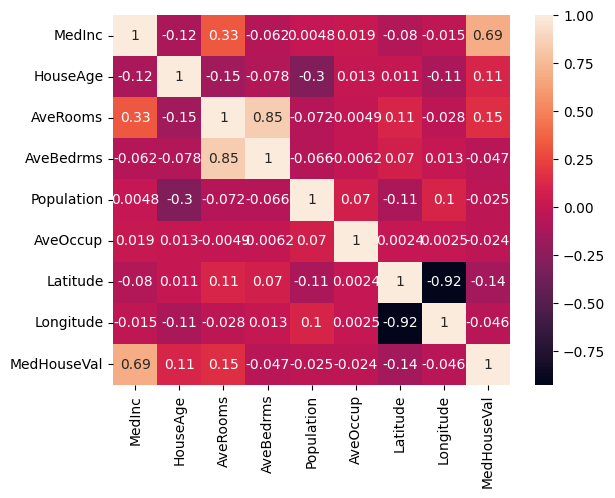

In [864]:
### get the correlation between all the columns and display it in a heatmap

sns.heatmap(df.corr(), annot=True)

## OBSERVATIONS:

1.  The above graph shows the correlation between all the features used in the dataset.

### Step 4: Do Data Preprocessing 

In [865]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### OBSERVATIONS

1. There are no NULL records in the dataset.

In [866]:
### Check for any duplicate records in the dataset

In [867]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


### OBSERVATIONS:

1.  There are no duplicate records in the dataset.

### Step 5: Divide the dataset into independent and dependent features and feature scaling on the inputs

In [868]:
### Divide the dataset into independent and dependent variables

X = df.drop(columns='MedHouseVal',axis=1)

Y = df['MedHouseVal']

In [869]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [870]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [871]:
### perform the feature scaling on the inputs

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [872]:
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

### OBSERVATIONS:

1.  All the inputs has been scaled in one range using feature scaling.

### Step 6: Splitting the Data into training and testing data

In [873]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [874]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [875]:
X_test

array([[-1.15248922, -0.2891866 , -0.49989596, ...,  0.07768129,
         0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 , ..., -0.03763415,
        -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 , ..., -0.164679  ,
         1.01509336, -1.43265267],
       ...,
       [ 2.82092723, -0.2891866 ,  0.73104024, ..., -0.02697551,
         0.78568194, -1.23799169],
       [-0.57147326,  0.58485227, -0.05657389, ..., -0.04641411,
         0.53286119, -0.09498235],
       [-0.16768875, -0.92485123, -0.58209158, ...,  0.06347664,
        -0.66101456,  0.59880935]])

In [876]:
print("Shape of the input training data is:", X_train.shape)

print("Shape of the input testing data is:", X_test.shape)

Shape of the input training data is: (16512, 8)
Shape of the input testing data is: (4128, 8)


In [877]:
Y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: MedHouseVal, Length: 16512, dtype: float64

In [878]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [879]:
print("Shape of the output training data is:", Y_train.shape)

print("Shape of the output testing data is:", Y_test.shape)

Shape of the output training data is: (16512,)
Shape of the output testing data is: (4128,)


### Step 7:  Train Gradient Boosting Model

In [880]:
from    sklearn.ensemble         import  GradientBoostingRegressor

gradientboostreg = GradientBoostingRegressor(
    n_estimators = 200                ,
    learning_rate = 0.1               ,
    max_depth     = 3                 ,
    random_state  = 42
)

In [881]:
gradientboostreg.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

### Step 8:  Perform the Predictions

In [882]:
Y_pred = gradientboostreg.predict(X_test)

In [883]:
Y_pred

array([0.4316757 , 1.09905826, 4.64157497, ..., 4.76864733, 0.79600204,
       1.88971353])

### Step 9: Do the Evaluation of the Algorithm

In [884]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, root_mean_squared_error

In [885]:
print("R2 Score is:", r2_score(Y_test, Y_pred))
print("Mean Absolute Error is:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error is:",  mean_squared_error(Y_test, Y_pred))

R2 Score is: 0.8004443339747364
Mean Absolute Error is: 0.3483507210429519
Mean Squared Error is: 0.26149953641834794


### Step 10: Plot the Actual vs  Predicted Price Value

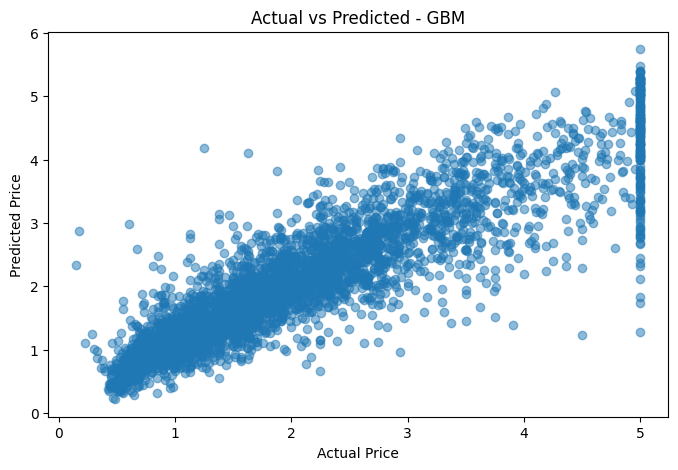

In [886]:
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred,alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted - GBM')
plt.show()

### OBSERVATIONS:

1. With the increase in Actual Price, the predicted price also increases.

### Step 11: Check the feature importances

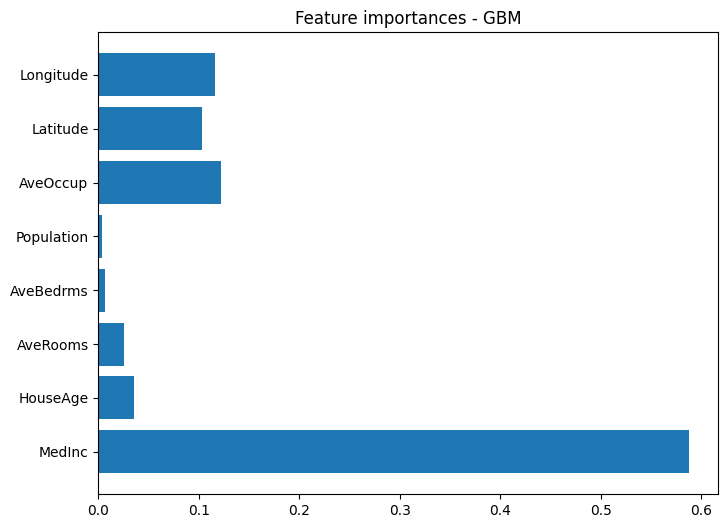

In [887]:
### get the most important features

feature_importances = gradientboostreg.feature_importances_

plt.figure(figsize=(8,6))
plt.barh(data.feature_names, feature_importances)
plt.title('Feature importances - GBM')
plt.show()